In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def my_central_diff(x,h): 
    central_diff=np.zeros((len(x))-2)
    for i in range(len(x)-2):
            central_diff[i]=((x[i+2]-x[i])/(2*h)) #計算central_diff
    return central_diff

In [3]:
def my_forward_diff(x,h): 
    forward_diff=np.zeros((len(x))-1)
    for i in range(len(x)-1):
            forward_diff[i]=((x[i+1]-x[i])/(h)) #計算forward_diff
    return forward_diff

In [4]:
def my_num_diff_w_smoothing(x,y,n):
    y_smooth = np.zeros(len(x)-2*n)
    for i in range(n,len(x)-n):
        y_smooth[i-n] = np.mean(y[i-n:i+n])#計算y_smooth
    h=2*np.pi/99
    dy = my_central_diff(y_smooth,h)#計算dy central_diff
    return dy,x[n+1:-n-1]

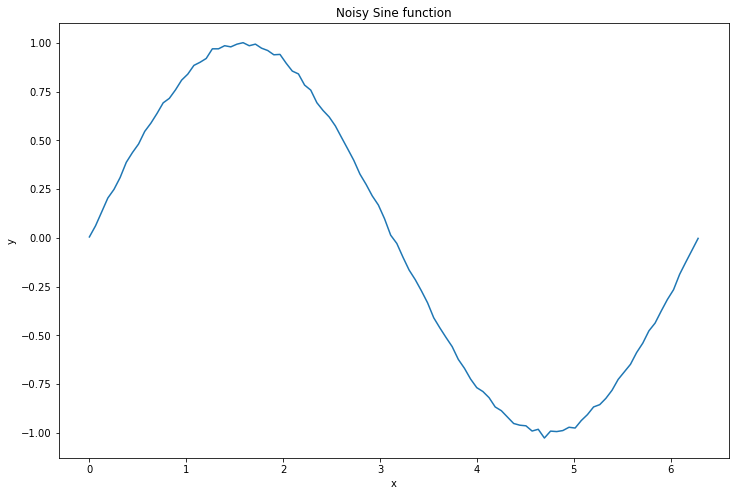

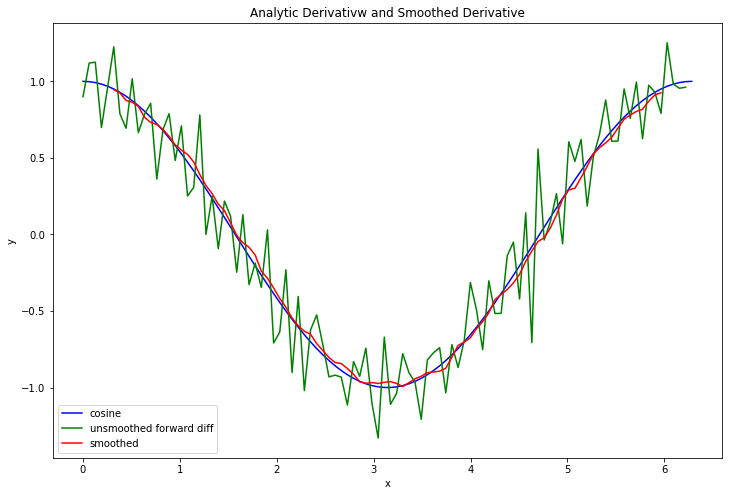

In [5]:
x = np.linspace(0, 2*np.pi, 100)
np.random.seed(42)
y = np.sin(x) + np.random.randn(len(x))/100

[dy, X] = my_num_diff_w_smoothing(x, y, 4)

h=2*np.pi/99

exact_solution = np.cos(x)
forward_diff = my_forward_diff(y,h)

# Plot Sine Function
plt.figure(figsize = (12, 8))
plt.xlabel('x')  
plt.ylabel('y') 

# displaying the title 
plt.title("Noisy Sine function") 

plt.plot(x, y)

# Plot solution
plt.figure(figsize = (12, 8))
plt.xlabel('x')  
plt.ylabel('y')  
# displaying the title 
plt.title("Analytic Derivativw and Smoothed Derivative") 
plt.plot(x, exact_solution, label = "cosine", color='blue')
plt.plot(x[:-1], forward_diff, label = "unsmoothed forward diff", color='green')
plt.plot(X, dy, label = "smoothed", color='red')


plt.legend()
plt.show()